In [63]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
#import r2
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Exploration

In [57]:
#import csv for exploration
df = pd.read_csv('lets_do_this.csv')
df

,total_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,happiness_index,cost_of_living_index,home_ownership_rate,...,palmer_drought_index,eci,inventory_to_sales_ratio,total_flights,case_shiller_index,number_of_disaster,consumer_confidence_index,ease_of_doing_business,jobs_report,consumer_expenditure_survey
0,41.474,2022,4,334.11,79405.0,4.10,3.5,7.0,59.0,65.9,...,-3.05,157.6,1.30,5692795,297.958333,283,96.831203,84.0,853.0,33088.0
1,43.999,2022,3,333.64,78595.0,2.56,3.5,7.0,59.0,66.0,...,-3.43,155.8,1.27,6517588,301.712333,535,96.364630,84.0,1270.0,33088.0
2,39.392,2022,2,333.13,77881.0,2.40,3.6,7.0,57.0,65.8,...,-2.82,154.0,1.25,6650777,303.336333,90,96.548767,84.0,988.0,33088.0
3,40.190,2022,1,332.74,75539.0,2.39,3.6,7.0,57.0,65.5,...,-3.20,151.8,1.21,5951390,290.880667,233,97.379660,84.0,1682.0,33088.0
4,34.476,2021,4,332.59,70784.0,2.27,3.9,6.9,57.6,65.4,...,-2.15,149.9,1.19,5745995,277.359000,179,98.018177,84.0,1964.0,33398.0
5,37.678,2021,3,332.29,70784.0,2.13,4.8,6.9,57.6,65.5,...,-1.77,148.0,1.13,6489169,266.831333,592,98.732847,84.0,1989.0,33398.0
6,35.683,2021,2,331.93,70784.0,1.91,5.9,6.9,57.2,65.4,...,-2.81,145.7,1.11,6675200,253.784667,236,99.834940,84.0,1461.0,33398.0
7,26.752,2021,1,331.73,70784.0,1.82,6.1,6.9,57.2,65.5,...,-3.01,144.5,1.12,5953073,242.271333,955,99.410773,84.0,1853.0,33398.0
8,36.228,2020,4,331.82,71186.0,1.68,6.7,6.9,56.7,65.8,...,-2.22,142.8,1.26,5878012,233.107667,373,99.202723,84.0,715.0,32808.0
9,35.952,2020,3,331.66,71186.0,1.55,7.9,6.9,56.7,67.4,...,-0.96,141.6,1.22,6530055,222.631000,1086,98.807807,84.0,4140.0,32808.0


In [7]:
def split_data(df):
    '''
    take in a DataFrame and target variable. return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123)
    return train, validate, test

In [8]:
#split data into train, validate, test
train, validate, test = split_data(df)
train.head()

,total_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,happiness_index,cost_of_living_index,home_ownership_rate,...,palmer_drought_index,eci,inventory_to_sales_ratio,total_flights,case_shiller_index,number_of_disaster,consumer_confidence_index,ease_of_doing_business,jobs_report,consumer_expenditure_survey
24,39.146,2016,4,323.91,66657.0,0.12,4.7,7.1,58.4,63.7,...,-1.40,127.3,1.48,6015820,184.749000,376,100.890333,83.6,447.0,32387.0
1,43.999,2022,3,333.64,78595.0,2.56,3.5,7.0,59.0,66.0,...,-3.43,155.8,1.27,6517588,301.712333,535,96.364630,84.0,1270.0,33088.0
30,38.144,2015,2,320.43,64631.0,0.09,5.3,7.1,56.8,63.4,...,1.70,122.8,1.45,6799173,170.880667,473,100.945633,82.6,771.0,32109.0
23,39.853,2017,1,324.34,67571.0,0.13,4.4,7.0,58.6,63.6,...,-1.23,128.2,1.49,6529978,187.372000,190,101.364367,83.6,567.0,32500.0
21,41.326,2017,3,325.34,67571.0,0.15,4.3,7.0,58.3,63.6,...,-0.31,129.9,1.46,6986514,192.633667,1005,101.183167,83.6,411.0,32500.0


In [22]:
def plot_that_target(train):
    """
    Visualize the target variable.

    Parameters:
    -----------
    train: pandas DataFrame
        
    Returns:
    --------
    countplot of revenue in the train data set
    """
    sns.histplot(data=train, x='total_revenue_B')
    plt.title('Ford revenue in Billions')
    plt.xlabel('Revenue in Billions')
    plt.ylabel('Quarters')
    plt.show

    return

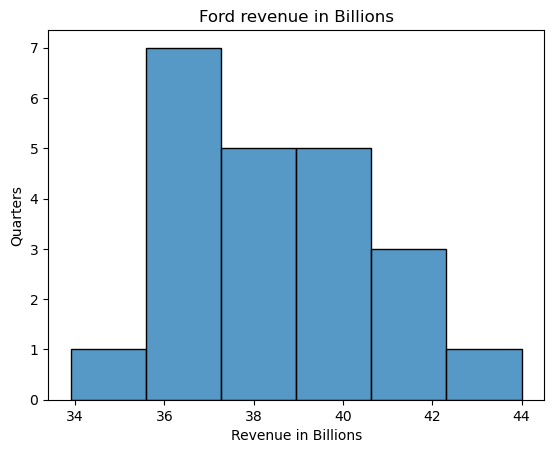

In [23]:
#use function to see
plot_that_target(train)

# Check for normalcy
$H_{0}$ The target is normally distributed.
    
$H_{a}$ The target is not normally distributed.

In [11]:
#check target for normalcy
statistic, p_value = stats.shapiro(train.total_revenue_B)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.9733065366744995
p-value: 0.7861835956573486


- based on the p-value being greater than 0.05, we fail to reject the null hypothesis and can infer that the target total revenue is normally distributed.

# View Pairwise relationships

In [12]:
def plot_variable_pairs(train):
    sns.set(style="ticks")
    sns.pairplot(train, kind="reg", corner = True, hue='total_revenue_B', plot_kws={'line_kws': {'color': 'red'}})
    plt.show()

In [ ]:
# use functions to see pairwise relationships
plot_variable_pairs(train)

# Uni-variate analysis

In [64]:
def univariate_visual(df):
    '''
    creates histplots for all of my columns
    '''
    num_cols = df.shape[1]
    num_rows = math.ceil(num_cols / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(14, 4*num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(rotation=45)

    plt.tight_layout()
    plt.show()

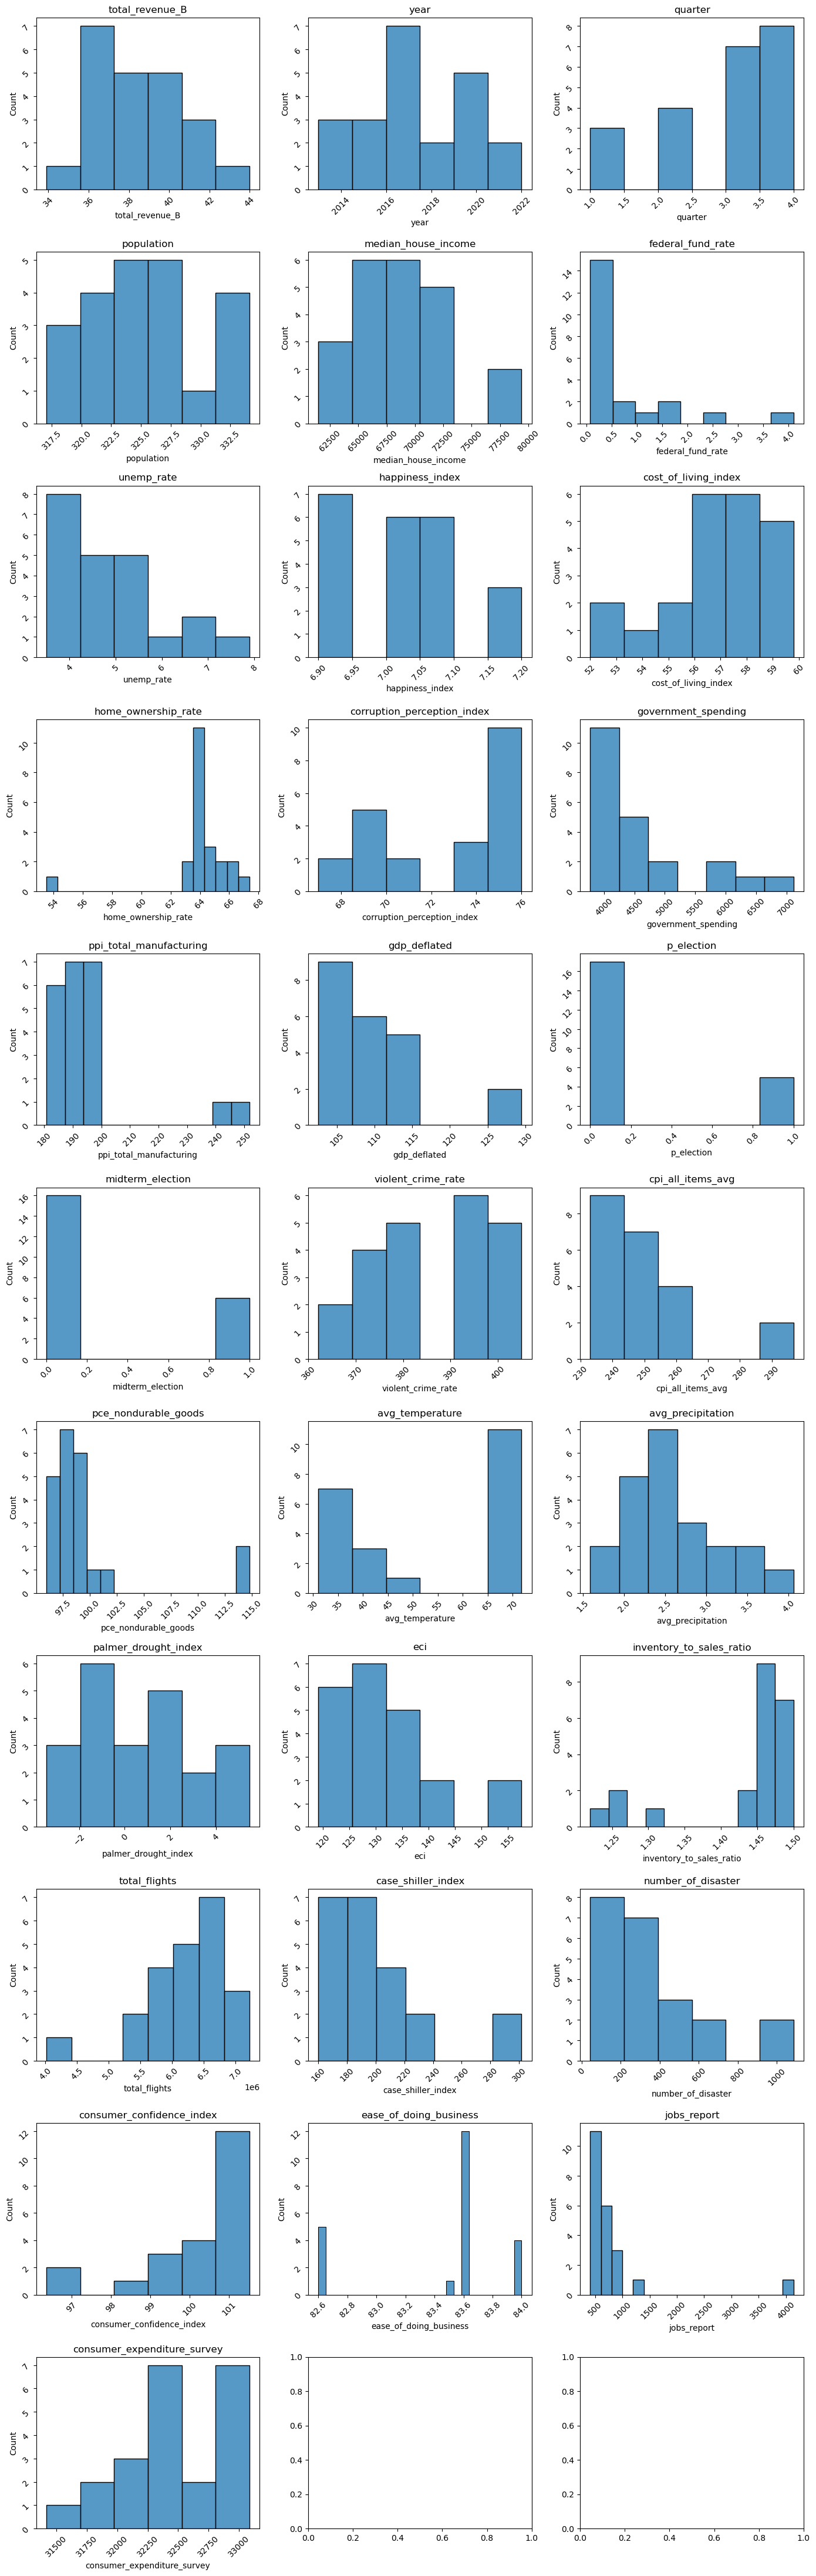

In [65]:
#run function to perform visual univariate analysis
univariate_visual(train)

# Bi-variate analysis

# Consumer Expenditure Survey

Does the Consumer Expenditure Survey impact revenue at Ford Motor Company?

$H_{0}$ Consumer Expenditure Survey does not influence revenue.
    
$H_{a}$ Consumer Expenditure Survey does influence revenue.

### Visualize

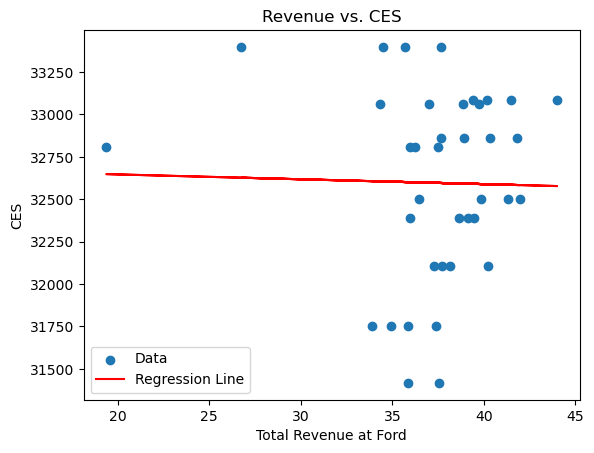

In [14]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['consumer_expenditure_survey'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['consumer_expenditure_survey'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. CES')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('CES')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Consumer Expenditure Survey is normally distributed.
    
$H_{a}$ Consumer Expenditure Survey is not normally distributed.

In [15]:
statistic, p_value = stats.shapiro(train.consumer_expenditure_survey)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.9231230020523071
p-value: 0.08824678510427475


- based on the p-value being greater than 0.05, we fail to reject the null hypothesis and can infer that the consumer expenditure survey is normally distributed.
- therefore, we will utilize the pearson's correlation test

### Stats test

In [16]:
# Run Pearson's correlation test 
correlation, p_value = stats.pearsonr(train.total_revenue_B, train.consumer_expenditure_survey)

# Print the test results
print("Pearson's Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Pearson's Correlation Test
Correlation Coefficient: 0.49913008801120834
p-value: 0.018037936513077297


- based on the p-value of the pearson's correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by CES.
- this feature will be moved into modeling

# Employment Cost Index

Does the Employment Cost Index impact revenue at Ford Motor Company?

$H_{0}$ Employment Cost Index does not influence revenue.

$H_{a}$ Employment Cost Index does influence revenue.

### Visualize

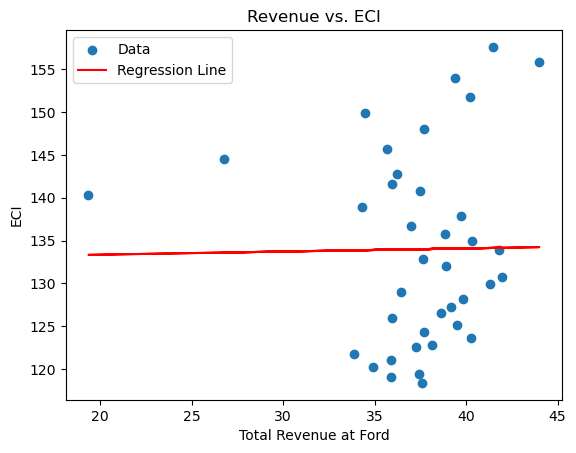

In [17]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['eci'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['eci'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. ECI')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('ECI')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Employment Cost Index is normally distributed.
    
$H_{a}$ Employment Cost Index is not normally distributed.

In [24]:
statistic, p_value = stats.shapiro(train.eci)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.8920897245407104
p-value: 0.020714521408081055


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the employment cost index is not-normally distributed.
- therefore, we will use the spearmans test

### Stats test

In [25]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.eci)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.48164878599661215
p-value: 0.02322568064366436


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by ECI.
- this feature will be moved into modeling

# Inventory to sales ratio

Does Inventory to sales ratio impact revenue at Ford Motor Company?

$H_{0}$ Inventory to sales ratio does not influence revenue.

$H_{a}$ Inventory to sales ratio does influence revenue.

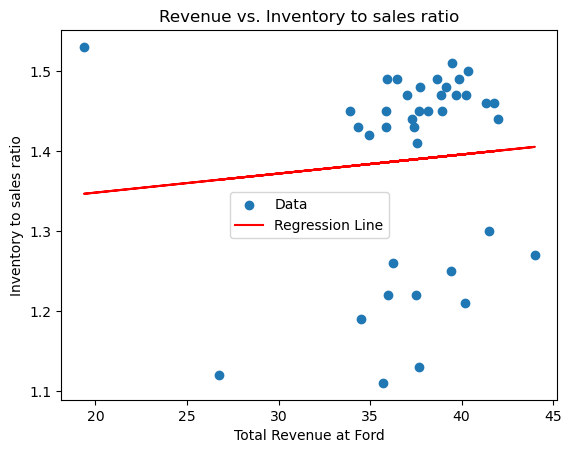

In [26]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['inventory_to_sales_ratio'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['inventory_to_sales_ratio'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Inventory to sales ratio')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Inventory to sales ratio')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Inventory to sales ratio is normally distributed.
    
$H_{a}$ Inventory to sales ratio is not normally distributed.

In [27]:
statistic, p_value = stats.shapiro(train.inventory_to_sales_ratio)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.6961700916290283
p-value: 1.7500437024864368e-05


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that inventory to sales ratio is not normally distributed.
- therefore, we will use the spearmans rank correlation test.

### Stats test

In [35]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.eci)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.48164878599661215
p-value: 0.02322568064366436


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by inventory to sales ratio.
- this feature will be used in modeling

# Producer Price Index

Does Producer Price Index impact revenue at Ford Motor Company?

$H_{0}$ Producer Price Index does not influence revenue.

$H_{a}$ Producer Price Index does influence revenue.

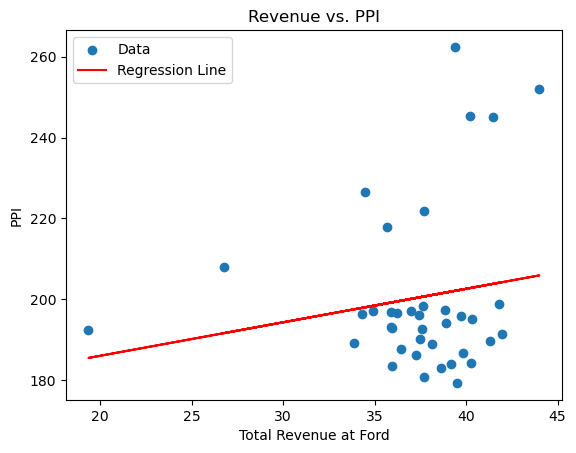

In [29]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['ppi_total_manufacturing'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['ppi_total_manufacturing'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. PPI')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('PPI')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Producer Price Index is normally distributed.
    
$H_{a}$ Producer Price Index is not normally distributed.



In [30]:
statistic, p_value = stats.shapiro(train.ppi_total_manufacturing)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.6155896782875061
p-value: 1.963363501999993e-06


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the producer price index is not normally distributed.
- therefore, we will run the spearman's rank correlation test. 

### Stats test

In [36]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.ppi_total_manufacturing)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.17447769621682668
p-value: 0.43740178605254565


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Companany revenue is not influenced by PPI.
- ***PPI will not be used in modeling***

# Gross domestic product implicit price deflator

Does the Gross domestic product implicit price deflator impact revenue at Ford Motor Company?

$H_{0}$ Gross domestic product implicit price deflator does not influence revenue.

$H_{a}$ Gross domestic product implicit price deflator does influence revenue.

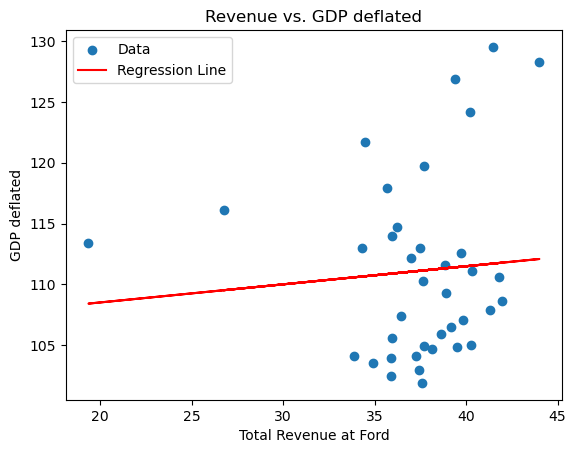

In [32]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['gdp_deflated'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['gdp_deflated'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. GDP deflated')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('GDP deflated')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Gross domestic product implicit price deflator is normally distributed.
    
$H_{a}$ Gross domestic product implicit price deflator is not normally distributed.

In [33]:
statistic, p_value = stats.shapiro(train.gdp_deflated)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.7806364297866821
p-value: 0.00025284598814323545


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the Gross domestic product implicit price deflator is not normally distributed.
- therefore, we will utilize the spearman's rank correlation test

### Stats test

In [34]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.gdp_deflated)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.49068322981366463
p-value: 0.020413268169169396


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by the Gross domestic product implicit price deflator.
- this feature will be used in modeling.

# Consumer Price Index

Does the Consumer Price Index impact revenue at Ford Motor Company?

$H_{0}$ Consumer Price Index does not influence revenue.

$H_{a}$ Consumer Price Index does influence revenue.

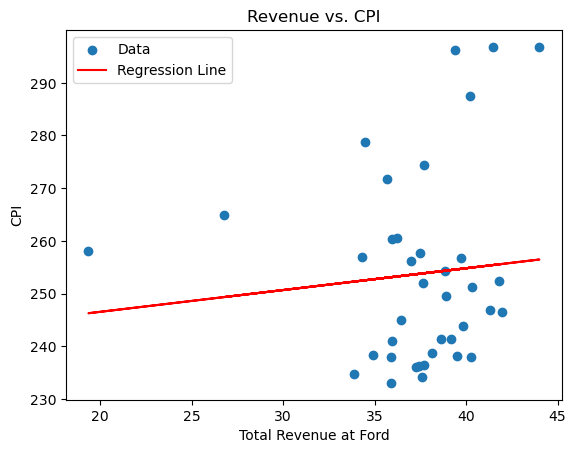

In [37]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['cpi_all_items_avg'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['cpi_all_items_avg'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. CPI')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('CPI')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Consumer Price Index is normally distributed.
    
$H_{a}$ Consumer Price Index is not normally distributed.


In [38]:
statistic, p_value = stats.shapiro(train.cpi_all_items_avg)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.7690956592559814
p-value: 0.00017068932356778532


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the Consumer Price Index is not normally distributed.
- therefore, we will use spearman's rank correlation test

### Stats test

In [39]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.cpi_all_items_avg)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.46019198193111244
p-value: 0.03115563325364231


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by Consumer Price Index.
- this feature will be used in modeling.


# Personal Consumption Expenditures - non-durable goods

Does Personal Consumption Expenditures impact revenue at Ford Motor Company?

$H_{0}$ Personal Consumption Expenditures does not influence revenue.

$H_{a}$ Personal Consumption Expenditures does influence revenue.

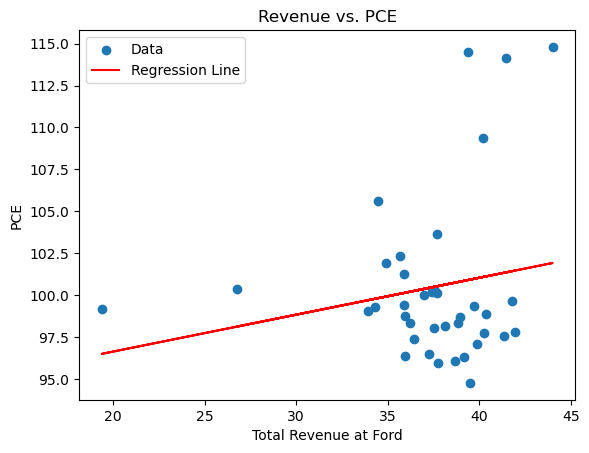

In [40]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['pce_nondurable_goods'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['pce_nondurable_goods'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. PCE')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('PCE')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Personal Consumption Expenditures are normally distributed.
    
$H_{a}$ Personal Consumption Expenditures are not normally distributed.

In [41]:
statistic, p_value = stats.shapiro(train.pce_nondurable_goods)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.5846637487411499
p-value: 9.114712042901374e-07


- based on the p-value being less than 0.05, we fail to reject the null hypothesis and can infer that Personal Consumption Expenditures are not normally distributed.
- therefore, we will use the spearman's rank correlation test.

### Stats test

In [42]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.pce_nondurable_goods)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.007340485601355168
p-value: 0.9741367424194011


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Companany revenue is not influenced by Personal Consumption Expenditures.
- ***This feature will not be used in modeling***

# Government spending

Does Government spending impact revenue at Ford Motor Company?

$H_{0}$ Government spending does not influence revenue.

$H_{a}$ Government spending does influence revenue.

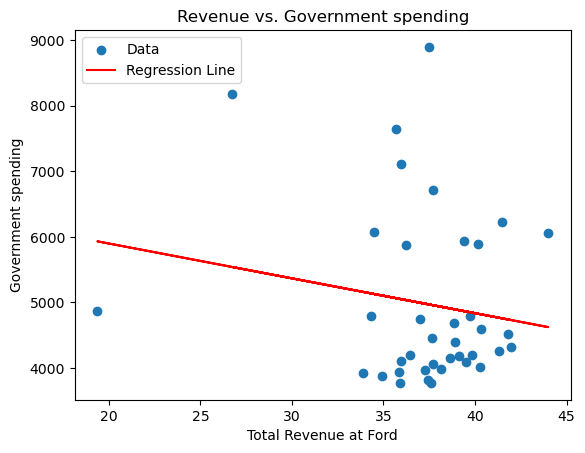

In [44]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['government_spending'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['government_spending'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Government spending')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Government spending')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Government spending is normally distributed.
    
$H_{a}$ Government spending is not normally distributed.

In [45]:
statistic, p_value = stats.shapiro(train.government_spending)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.7695217728614807
p-value: 0.00017315347213298082


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that Government spending is not normally distributed.
- therefore, we will use the spearman's rank correlation test

### Stats test

In [46]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.government_spending)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.4455110107284021
p-value: 0.037717047862613165


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by Government spending.
- this feature will be used in modeling.

# Median household income

Does Median household income impact revenue at Ford Motor Company?

$H_{0}$ Median household income does not influence revenue.

$H_{a}$ Median household income does influence revenue.



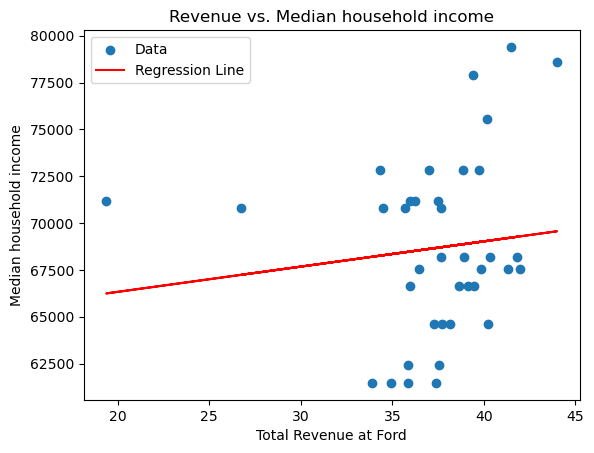

In [47]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['median_house_income'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['median_house_income'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Median household income')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Median household income')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Median household income is normally distributed.
    
$H_{a}$ Median household income is not normally distributed.

In [48]:
statistic, p_value = stats.shapiro(train.median_house_income)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.9256210923194885
p-value: 0.09945787489414215


- based on the p-value being greater than 0.05, we fail to reject the null hypothesis and can infer that Median household income is normally distributed.

### Stats test

In [50]:
# Run Pearson's correlation test 
correlation, p_value = stats.pearsonr(train.total_revenue_B, train.median_house_income)

# Print the test results
print("Pearson's Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Pearson's Correlation Test
Correlation Coefficient: 0.5457245778243649
p-value: 0.008610651180462031


- based on the p-value of the pearsonsr correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by Median household income.
- this feature will be used in modeling

# Federal fund rate

Does the Federal fund rate impact revenue at Ford Motor Company?

$H_{0}$ Federal fund rate does not influence revenue.

$H_{a}$ Federal fund rate does influence revenue.

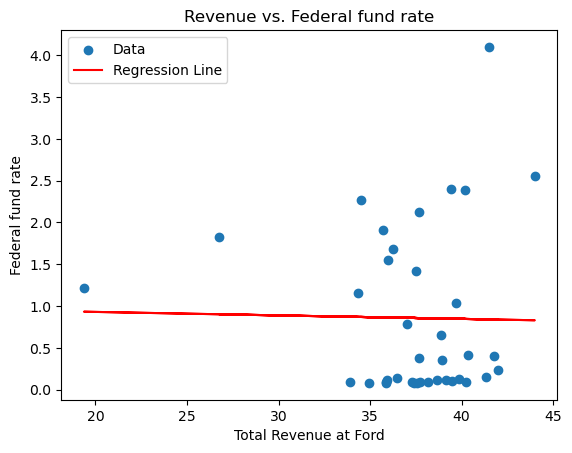

In [51]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['federal_fund_rate'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['federal_fund_rate'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Federal fund rate')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Federal fund rate')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Federal fund rate is normally distributed.
    
$H_{a}$ Federal fund rate is not normally distributed.

In [52]:
# Test for Normalcy
statistic, p_value = stats.shapiro(train.federal_fund_rate)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.6466044187545776
p-value: 4.4017988329869695e-06


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the federal fund rate is not normally distributed.
- therefore, we will use the spearman's rank correlation test

### Stats test

In [53]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.federal_fund_rate)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.44647201369657835
p-value: 0.03725690367722557


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by Federal fund rate.
- this feature will be used in modeling.

# Jobs report

Does the Jobs report impact revenue at Ford Motor Company?

$H_{0}$ Jobs report does not influence revenue.

$H_{a}$ Jobs report does influence revenue.

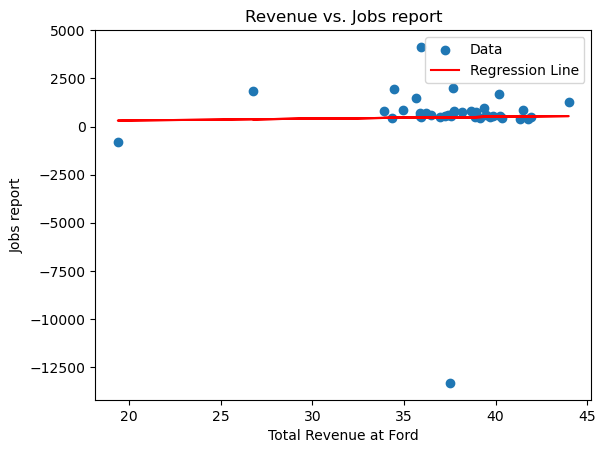

In [54]:
# Scatter plot to visualize the relationship
plt.scatter(df['total_revenue_B'], df['jobs_report'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(df['total_revenue_B'], df['jobs_report'])
line = slope * df['total_revenue_B'] + intercept

# Plot the regression line
plt.plot(df['total_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Jobs report')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Jobs report')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Test for normalcy
$H_{0}$ Jobs report is normally distributed.
    
$H_{a}$ Jobs report is not normally distributed.

In [55]:
statistic, p_value = stats.shapiro(train.jobs_report)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.4317329525947571
p-value: 3.189947861415021e-08


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the jobs report is not normally distributed.
- therefore, we will use the spearman's rank correlation test

### Stats test

In [56]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.total_revenue_B, train.jobs_report)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.15640880858272163
p-value: 0.4869950838634771


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by the jobs report.
- ***this feature will not be used in modeling***

# Exploration Summary
- visualized
- checked for normalcy to determine parametric or non-parametric testing
- checked for statistical significance utilizing either pearson's or spearman's correlation tests
- found that 3 of 11 features tested are not significant to Ford motor company's revenue
    - Jobs report
    - PPI - Producer price index
    - PCE - Personal consumption expenditures non-durable goods
- recommend removing those from the dataframe prior to scaling and moving into modeling


# Multi-variate analysis


In [72]:
def multivariate_exploration(df, target_variable):
    '''
    Perform different combinations of visualizations to explore relationships with the target variable
    '''

    # Numeric variables for scatter plots
    numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Remove target variable from the list of numeric variables
    numeric_vars.remove(target_variable)

    # Plot scatter plots for numeric variables
    for var in numeric_vars:
        sns.scatterplot(x=var, y=target_variable, data=df)
        plt.xlabel(var)
        plt.ylabel(target_variable)
        plt.title(f'{var} vs. {target_variable}')
        plt.show()

    # Categorical variables for box plots
    categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

    # Plot box plots for categorical variables
    for var in categorical_vars:
        sns.boxplot(x=var, y=target_variable, data=df)
        plt.xlabel(var)
        plt.ylabel(target_variable)
        plt.title(f'{var} vs. {target_variable}')
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    corr = df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Pairplot for selected variables
    selected_vars = numeric_vars[:4]  # Select first 4 numeric variables for pairplot
    selected_vars.append(target_variable)
    sns.pairplot(df[selected_vars], diag_kind='hist', plot_kws={'alpha': 0.5})
    plt.show()

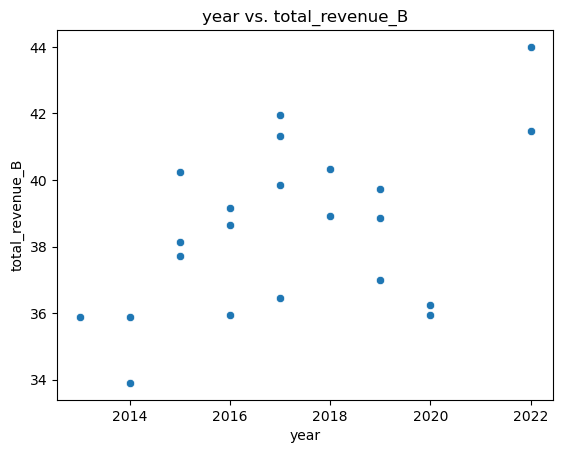

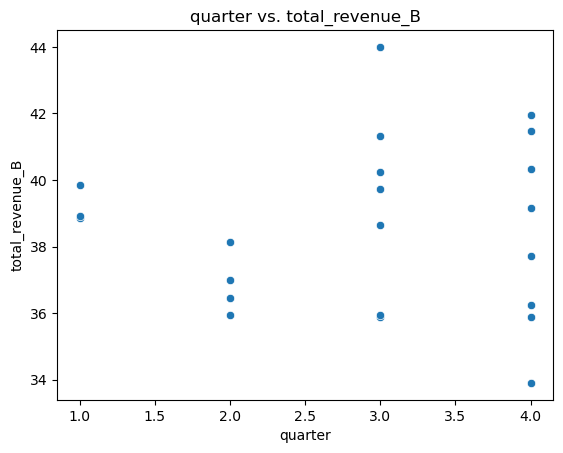

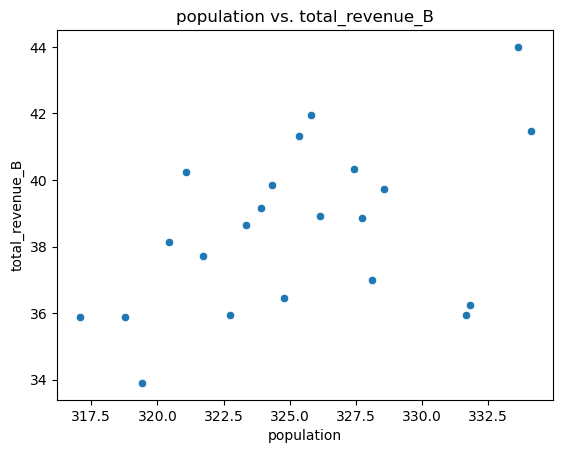

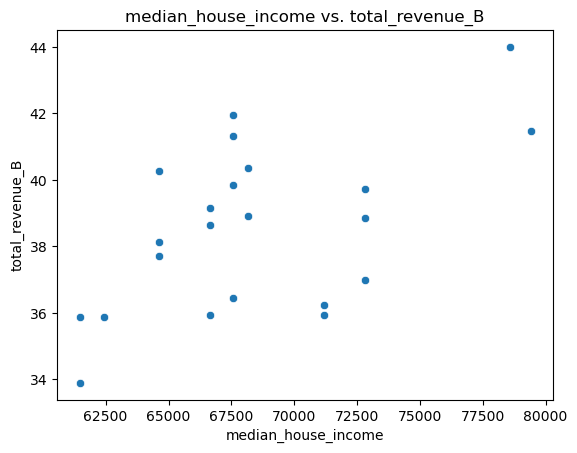

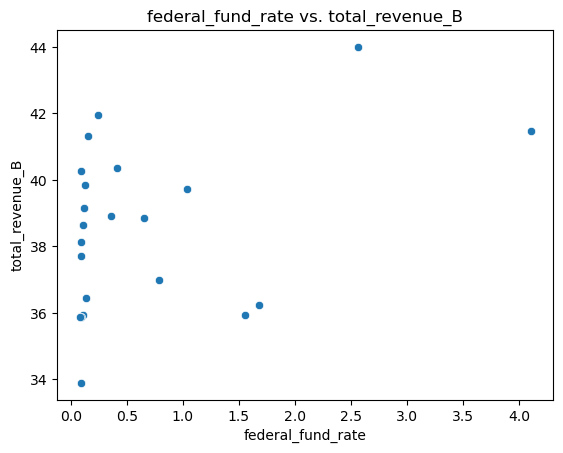

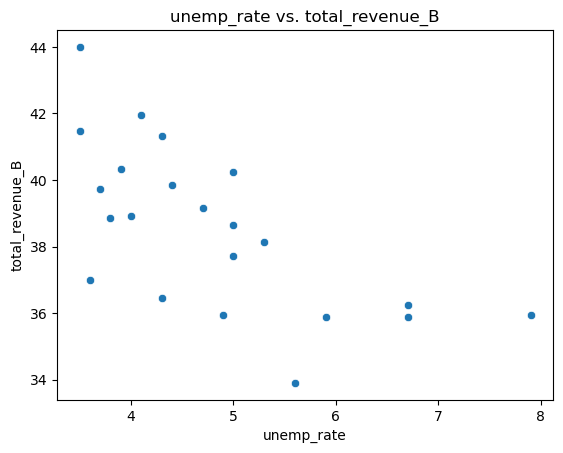

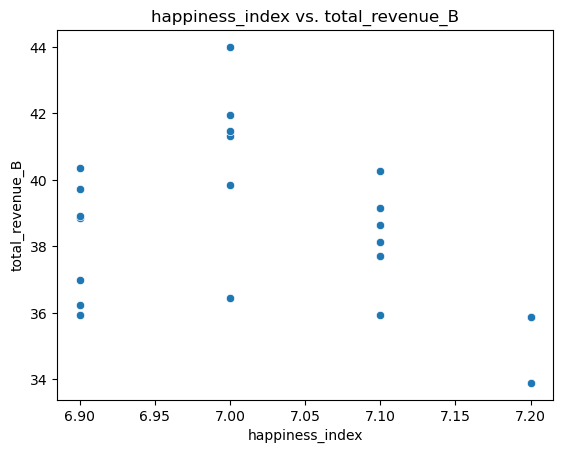

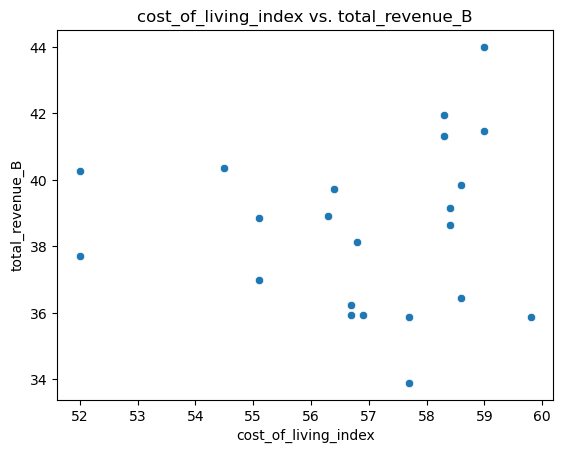

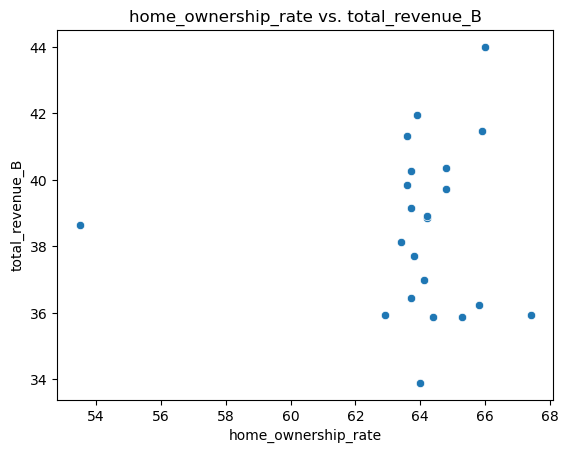

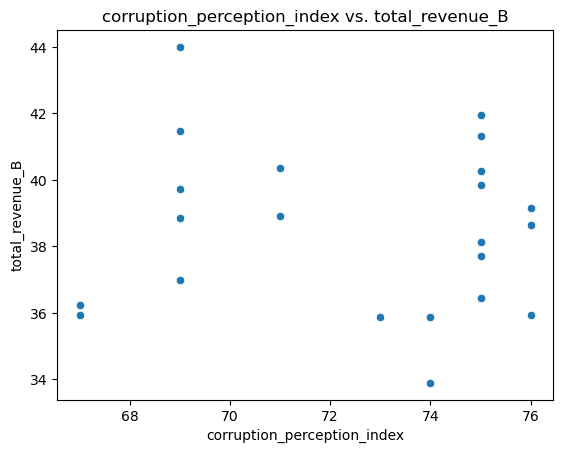

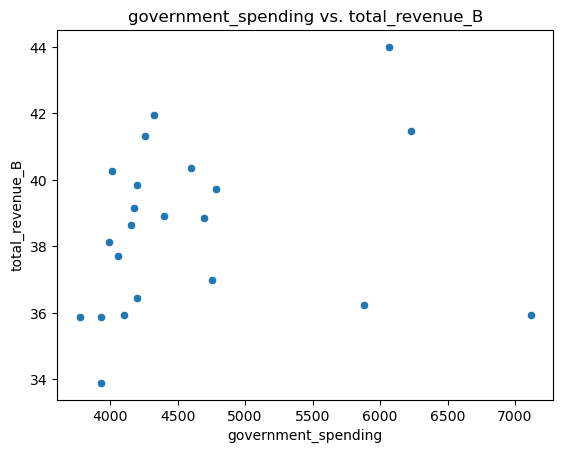

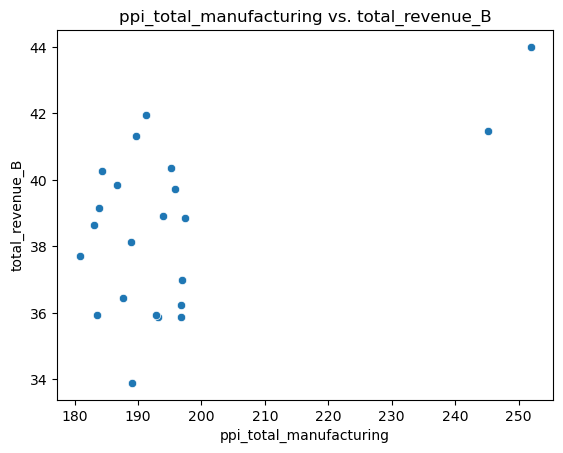

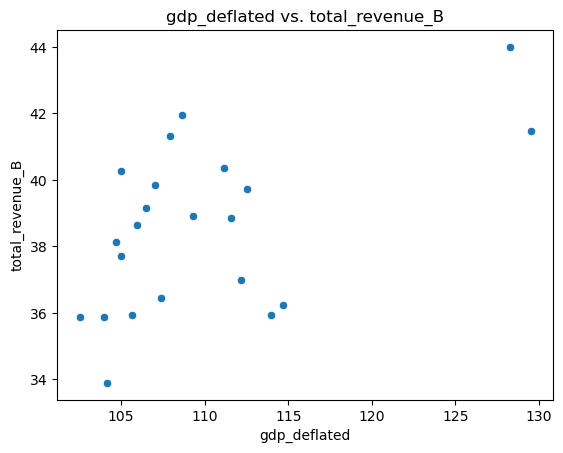

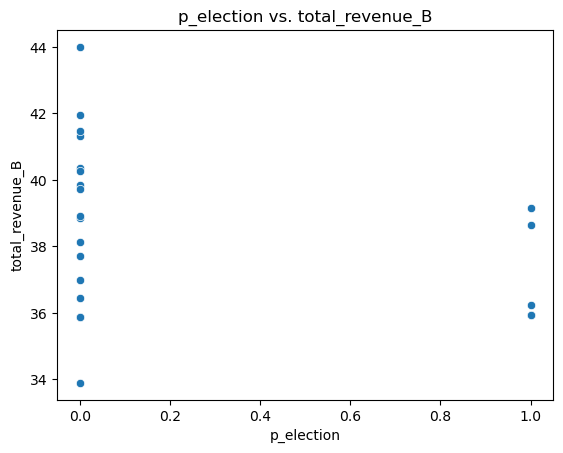

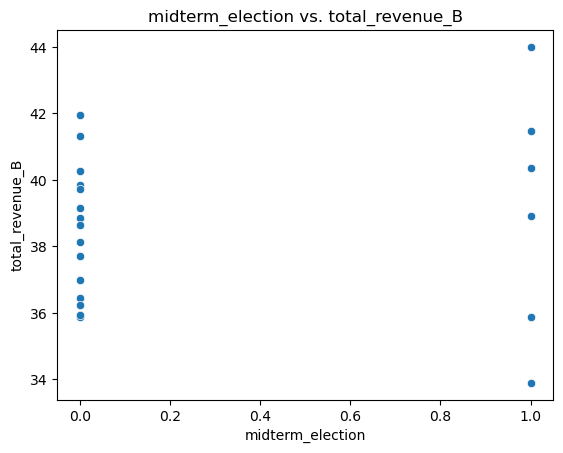

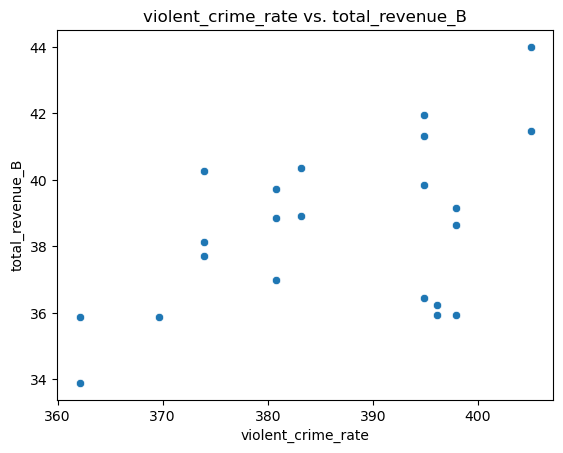

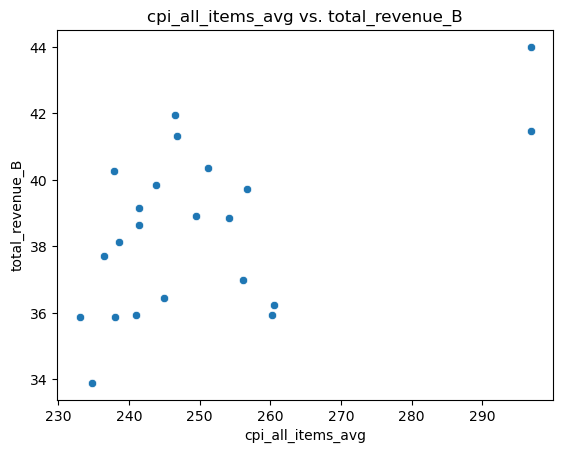

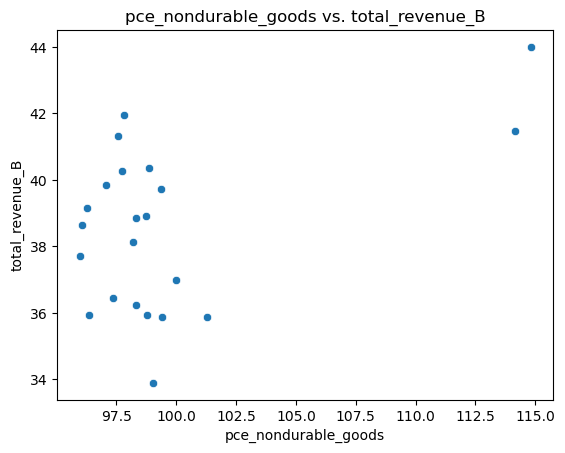

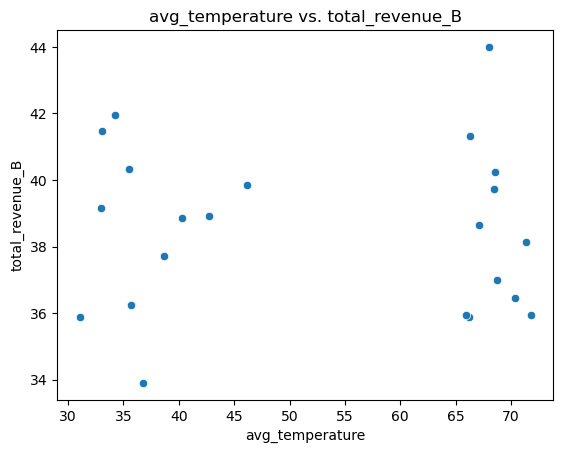

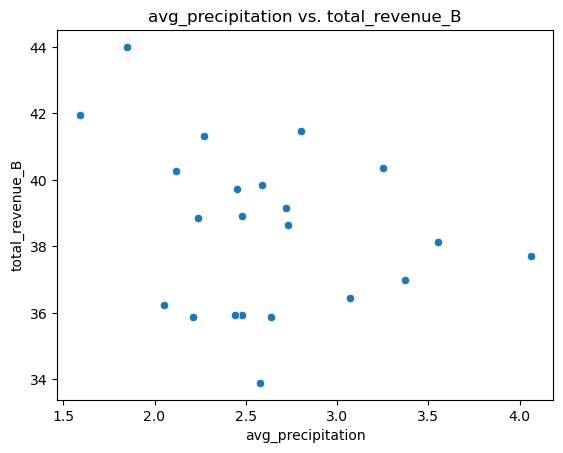

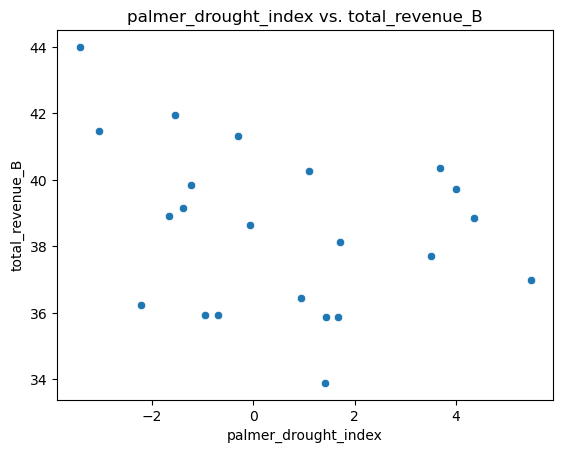

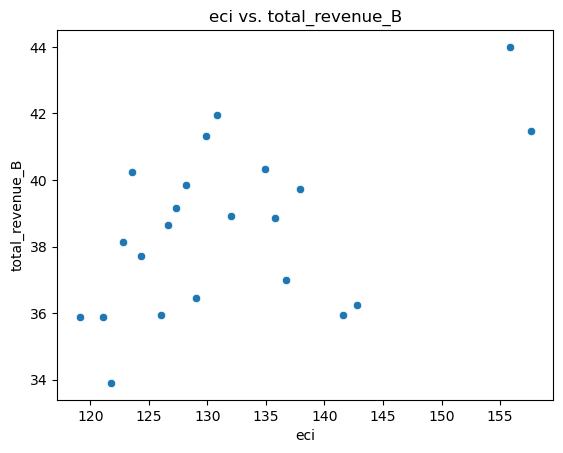

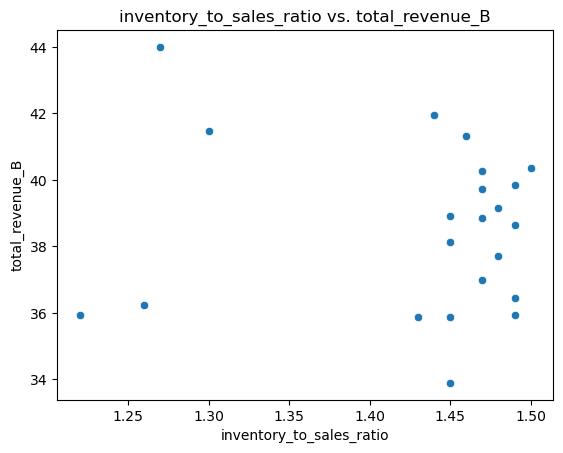

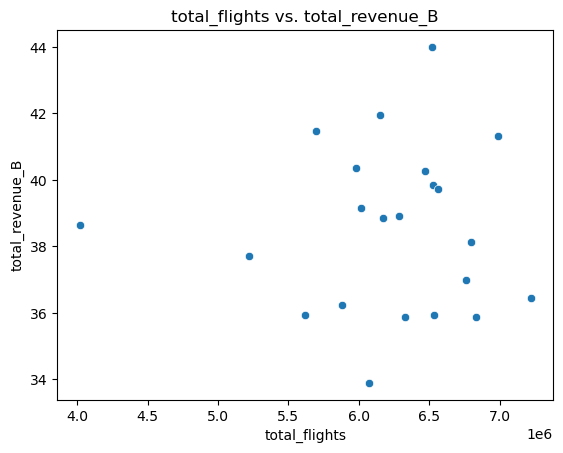

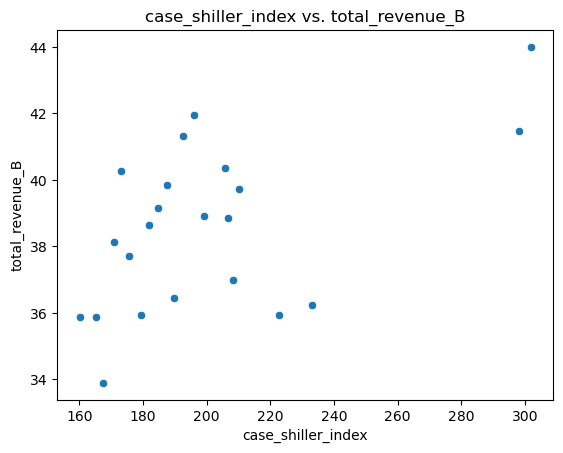

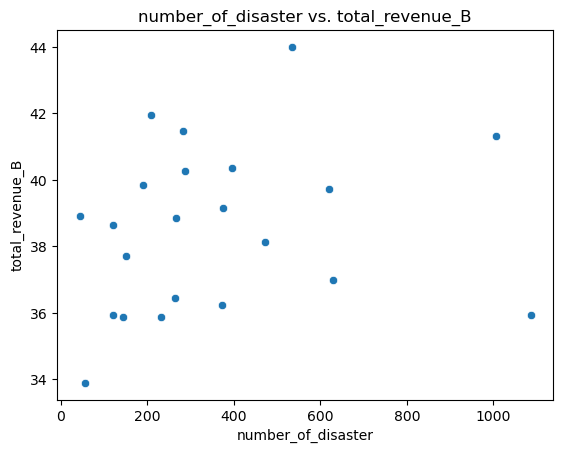

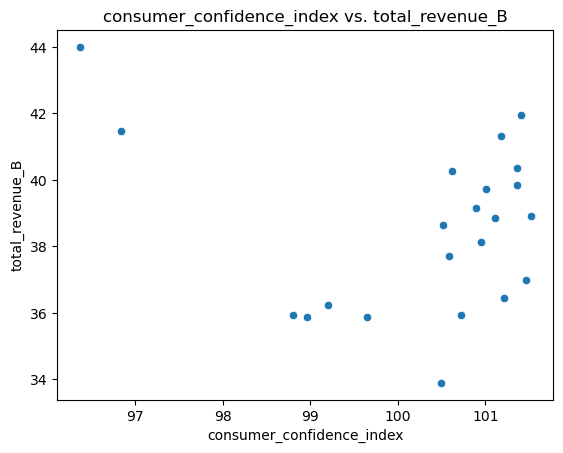

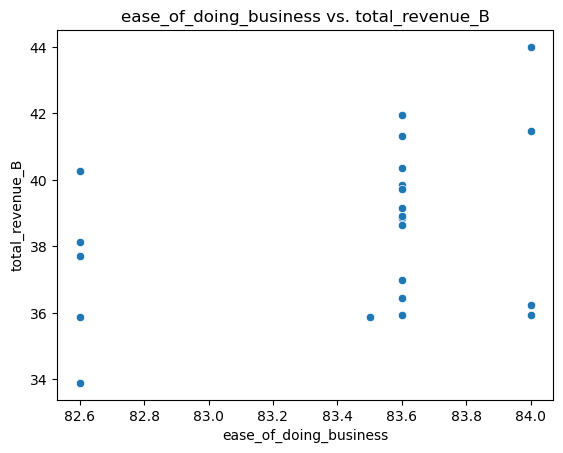

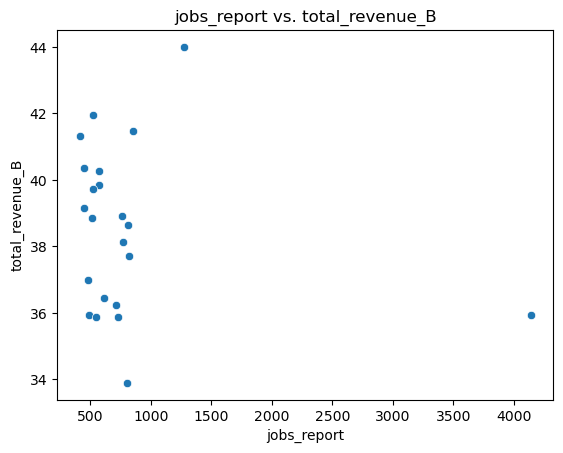

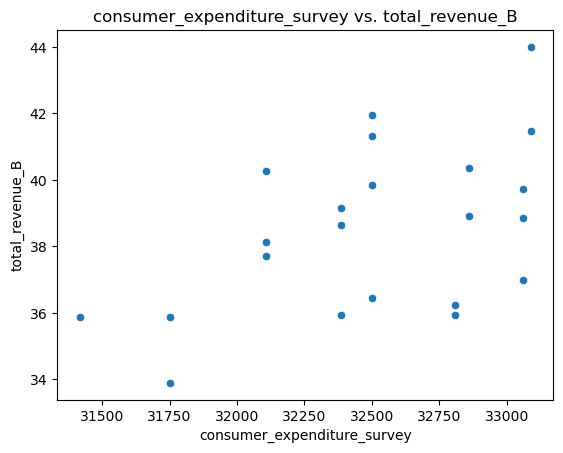

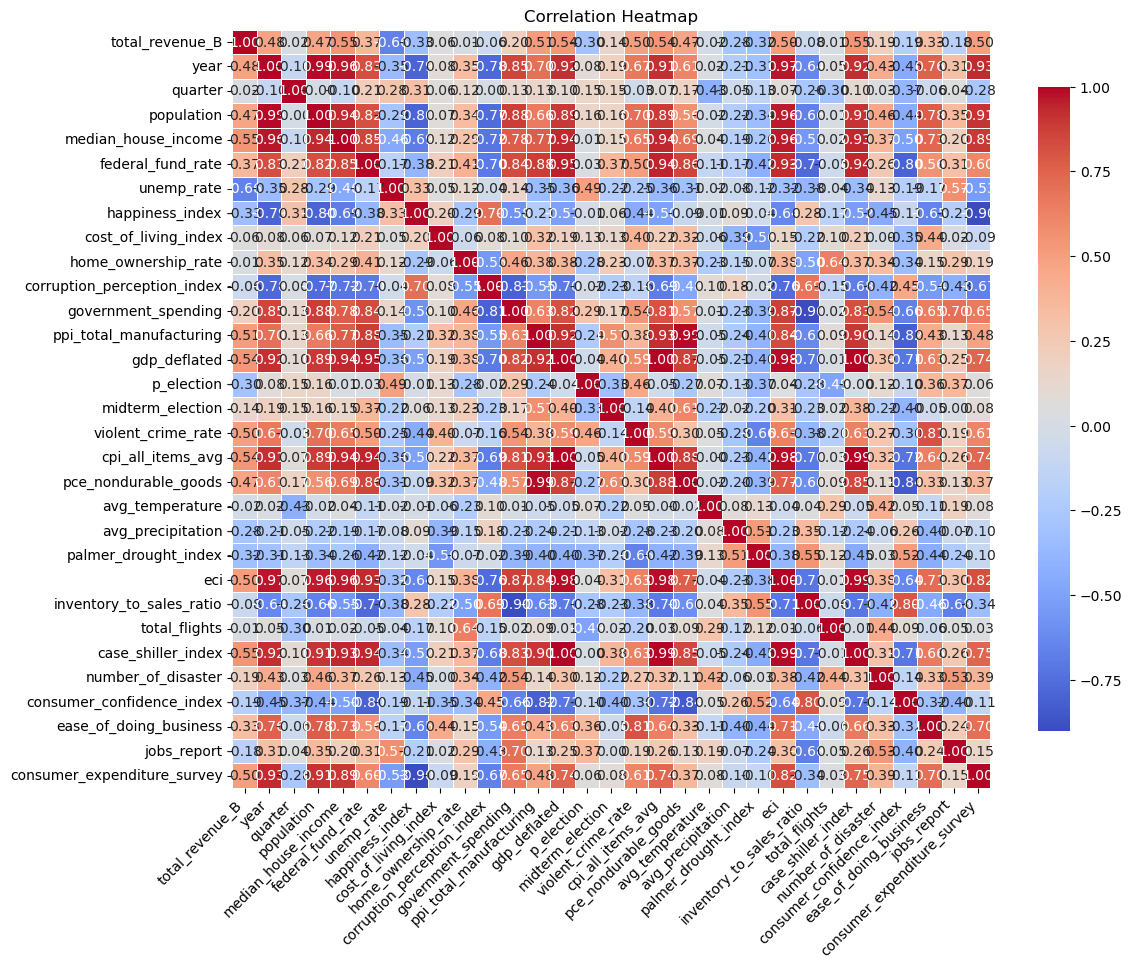

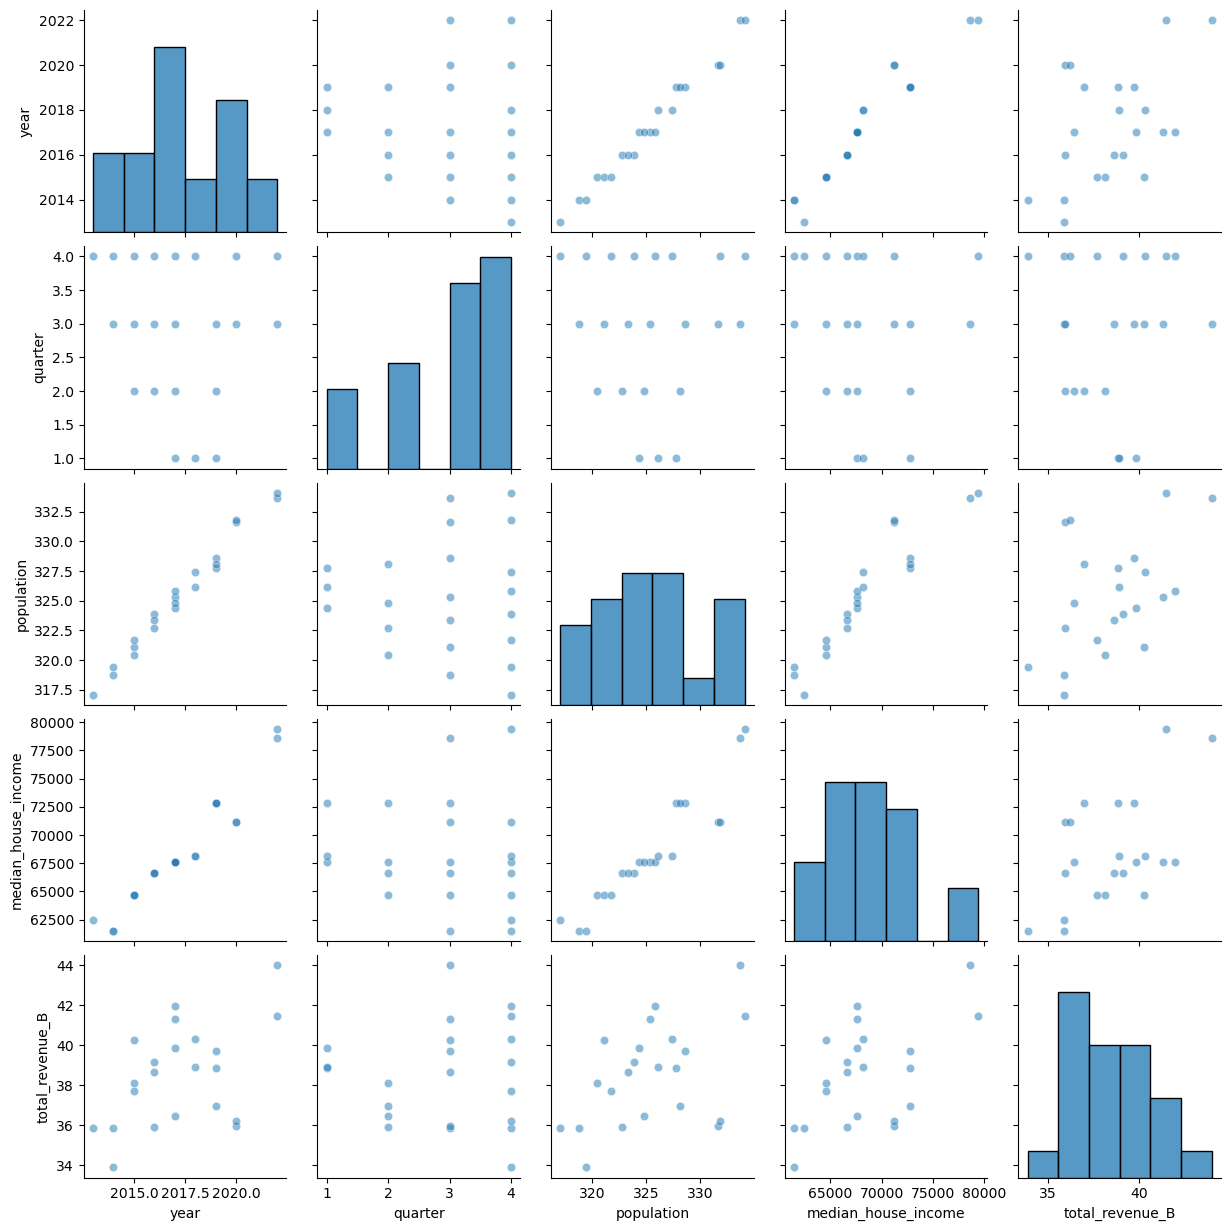

In [74]:
multivariate_exploration(train, 'total_revenue_B')